In [1]:
# Importing all needed libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline
style.use("fivethirtyeight")

In [42]:
#importing and preparing data
covid = pd.read_csv("/Users/miguelsomr/Documents/concordia-bootcamps/Project 2/data/Covid_data.csv")
covid = covid.dropna()
covid['Date de déclaration du cas'] = pd.to_datetime(covid['Date de déclaration du cas'])
covid['Par lien épidémiologique'] = covid['Par lien épidémiologique'].astype(float)
covid['En laboratoire'] = covid['En laboratoire'].astype(float)
covid['Moyenne mobile (7 jours)'] = covid['Moyenne mobile (7 jours)'].astype(float)
DayCount = list(range(606))
DayCount = pd.Series(DayCount)
covid['day'] = DayCount
covid['total_cases'] = covid['Par lien épidémiologique'] + covid['En laboratoire']
covid['total_cases'] = pd.to_numeric(covid['total_cases'])
covid

,Date de déclaration du cas,Par lien épidémiologique,En laboratoire,Moyenne mobile (7 jours),day,total_cases
0,2020-02-24,0.0,0.0,0.14,0,0.0
1,2020-02-25,0.0,1.0,0.29,1,1.0
2,2020-02-26,0.0,0.0,0.29,2,0.0
3,2020-02-27,0.0,0.0,0.43,3,0.0
4,2020-02-28,0.0,1.0,0.86,4,1.0
...,...,...,...,...,...,...
601,2021-10-17,1.0,347.0,497.14,601,348.0
602,2021-10-18,3.0,391.0,1099.43,602,394.0
603,2021-10-19,2.0,447.0,1150.57,603,449.0
604,2021-10-20,6.0,408.0,1194.57,604,414.0


In [43]:
# creating a df for each date change to analyze
Mar20 = covid[0:50].reset_index(drop=True)
Mar20.head()

#choosing 25 days before and after the specific day

,Date de déclaration du cas,Par lien épidémiologique,En laboratoire,Moyenne mobile (7 jours),day,total_cases
0,2020-02-24,0.0,0.0,0.14,0,0.0
1,2020-02-25,0.0,1.0,0.29,1,1.0
2,2020-02-26,0.0,0.0,0.29,2,0.0
3,2020-02-27,0.0,0.0,0.43,3,0.0
4,2020-02-28,0.0,1.0,0.86,4,1.0


In [44]:
# The 20/3/2020 lockdown
Mar20['day'] = range(-25,25)
y = Mar20['total_cases']
X = Mar20['day']

rd = Mar20.assign(threshold=(X>0))
result = smf.wls('y~X*threshold', rd).fit()

print(result.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            WLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     242.6
Date:                Sun, 29 May 2022   Prob (F-statistic):           3.42e-28
Time:                        21:16:14   Log-Likelihood:                -290.44
No. Observations:                  50   AIC:                             588.9
Df Residuals:                      46   BIC:                             596.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              45.9231    

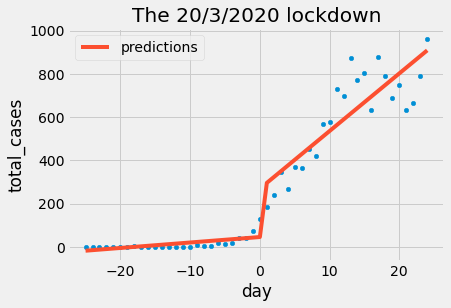

In [45]:
ax = Mar20.plot.scatter(x='day', y='total_cases', color="C0")
Mar20.assign(predictions=result.fittedvalues).plot(x='day', y='predictions', ax=ax, color="C1")
plt.title("The 20/3/2020 lockdown");

This model is telling us that cases increased by 223.7219 points with the March lockdown. This makes sense since
is in the very beginning of the pandemic and cases were increasing each day.

In [47]:
# The reopening of schools on 31/8/2020
Aug31 = covid[164:215].reset_index(drop=True)
Aug31['day'] = range(-25,26)
Aug31.head()

,Date de déclaration du cas,Par lien épidémiologique,En laboratoire,Moyenne mobile (7 jours),day,total_cases
0,2020-08-06,7.0,86.0,121.57,-25,93.0
1,2020-08-07,7.0,121.0,115.00,-24,128.0
2,2020-08-08,8.0,107.0,108.00,-23,115.0
3,2020-08-09,6.0,91.0,103.29,-22,97.0
4,2020-08-10,7.0,92.0,104.00,-21,99.0


In [48]:
y = Aug31['total_cases']
X = Aug31['day']

rd_aug = Aug31.assign(threshold=(X>0))
result2 = smf.wls('y~X*threshold', rd_aug).fit()

print(result2.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            WLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     180.0
Date:                Sun, 29 May 2022   Prob (F-statistic):           9.05e-26
Time:                        21:16:14   Log-Likelihood:                -272.63
No. Observations:                  51   AIC:                             553.3
Df Residuals:                      47   BIC:                             561.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             104.1026    

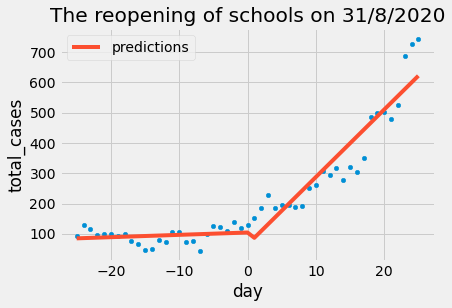

In [49]:
ax = Aug31.plot.scatter(x='day', y='total_cases', color="C0")
Aug31.assign(predictions=result2.fittedvalues).plot(x='day', y='predictions', ax=ax, color="C1")
plt.title("The reopening of schools on 31/8/2020");

This model is telling us that cases increased by -39.8526 points when schools were reopened.
I would assume that the health measures that were taking place at school helped on the cases not going up

In [51]:
#The 25/12/2020 lockdown
Dec25 = covid[280:331].reset_index(drop=True)
Dec25['day'] = range(-25,26)
Dec25.head()

,Date de déclaration du cas,Par lien épidémiologique,En laboratoire,Moyenne mobile (7 jours),day,total_cases
0,2020-11-30,22.0,1248.0,1419.00,-25,1270.0
1,2020-12-01,14.0,1504.0,1487.86,-24,1518.0
2,2020-12-02,17.0,1528.0,1517.71,-23,1545.0
3,2020-12-03,19.0,1484.0,1539.86,-22,1503.0
4,2020-12-04,21.0,1743.0,1590.71,-21,1764.0


In [52]:
y = Dec25['total_cases']
X = Dec25['day']

rd_dec = Dec25.assign(threshold=(X>0))
result3 = smf.wls('y~X*threshold', rd_dec).fit()

print(result3.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.658
Model:                            WLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     30.17
Date:                Sun, 29 May 2022   Prob (F-statistic):           5.03e-11
Time:                        21:16:14   Log-Likelihood:                -351.96
No. Observations:                  51   AIC:                             711.9
Df Residuals:                      47   BIC:                             719.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2315.9658    

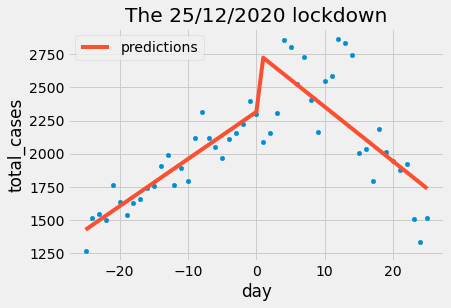

In [53]:
ax = Dec25.plot.scatter(x='day', y='total_cases', color="C0")
Dec25.assign(predictions=result3.fittedvalues).plot(x='day', y='predictions', ax=ax, color="C1")
plt.title("The 25/12/2020 lockdown");

This model is telling us that cases increased by 448.4142 points for christmas which is a lot,
by this time the cases where going up very drastically since Omicron came into play.
Notice p-value is very low so is significant.